# Part 5 of Drawing Ideograms: Cropping

This page is primarily based on the following page at the Circos documentation site:



- [5. Cropping](????????????)



That page is found as part number 4 of the ??? part ['Drawing Ideograms' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to Part 4 by clicking [here &#8592;](Drawing_ideograms_Part4.ipynb).



----



2 --- Drawing Ideograms
=======================

5. Cropping
-----------

::: {#menu4}
[[Lesson](/documentation/tutorials/ideograms/cropping/lesson){.clean}]{.active}
[Images](/documentation/tutorials/ideograms/cropping/images){.normal}
[Configuration](/documentation/tutorials/ideograms/cropping/configuration){.normal}
:::

If you do not wish to have the entire ideogram drawn, you can choose to
create an axis break and remove a region from the display. This can be
achieved in two ways: specify what to draw, or specify what not to draw.

You should never use the [karyotype
file](http://mkweb.bcgsc.ca/circos/tutorials/lessons/ideograms/karyotypes)
to crop the ideograms. In other words, in the karyotype file the
chromosome start/end positions should reflect the physical chromosome
size, not the regions you wish to draw.

### specifying chromosome ranges

To specify what regions of an ideogram to draw, use the following syntax

```ini
chromosomes = ...;ID:START-END;...
```


For example,

```ini
chromosomes_units = 1000000
chromosomes       = hs1:0-100;hs2:50-150;hs3:50-100;hs4;hs5;hs6;hs7;hs8
```


Will draw all 8 chromosomes, but only 0-100 Mb of hs1, 50-150Mb of hs2
and 50-100 Mb of hs3. The start and end ranges are given in units of
chromosomes\_units.

### chromosomes\_units

This parameter defines a multiplier which can be applied to many other
variable values within the configuration files. Some values have this
multiplier automatically applied (e.g. the display ranges in the
chromosomes parameter, like shown above). Other values require the use
of the \"u\" suffix. For example,

```ini
spacing = 5u
```


In this case, this tick\'s spacing is 5u. If chromosomes\_units=1000000,
then the tick spacing is 5Mb.

The chromosome units value can be defined in absolute terms, such as
1000000 (1Mb), or in relative terms, such as 0.005r. The relative
definition is calculated relative to the total size of all ideograms in
the image. For example, you show the entire human genome (3Gb) in the
image, and use chromosome\_units=0.001r, then this is equivalent to a
chromosome\_units value of 3Mb (0.001 \* 3Gb).

The reason why the relative value is useful is to maintain relatively
constant (and sane!) spacing between elements that use the
chromosomes\_unit value (such as ticks) when the number and size of
ideograms changes in the image.

Let\'s look at a quick example. Suppose that you show the entire human
genome and you set chromosomes\_units=0.001r. The unit multiplier is
0.001=1/1000 and you are effectively dividing the image into 1000 slices
(every 1Mb). If your major ticks are spaced every 10u, then you will
have a major tick every 10Mb and there will be about 300 major ticks
around your image. Now consider what happens when you change the
ideogram set to display, and let\'s say that you\'re now showing only
one ideogram whose size is 100Mb. If chromosomes\_unit was constant
(1Mb) , then the tick mark spacing would still be 10Mb and you would
only have 10 major ticks. This may be too coarse a scale. However, if
your chromosomes\_units value is relative (e.g. 0.001r), then your major
tick marks will be spaced every 10u = 10\*(100\*0.001) = 1Mb and you
will have 100 major ticks. Thus, even though you radically changed the
extent of the data domain, spacing of elements in the image relative to
the image dimensions is maintained.

### axis breaks

Axis breaks are defined in the \<ideogram\> block and will be covered in
another tutorial section. For now, take a look at the ideogram.conf file
associated with this section for a preview of how breaks are defined.

### supressing ranges

Instead of specifying what to draw, you can supress a range by using
chromosomes\_breaks

```ini
chromosomes = hs1;hs2;hs3;hs4;hs5;hs6;hs7;hs8
chromosomes_breaks = -hs1:100-200;-hs2:0-50;-hs2:150-);-hs3:0-50
```


Each of the entries in chromosomes\_breaks must be preceeded by a \"-\"
and specifies a range to exclude from the final image. You can specify
multiple ranges for a chromosome. Use \")\" to indicate the end of the
chromosome (e.g., -hs2:150-) supresses drawing from 150 Mb to the end of
the chromosome).

### combining region declarations

You can combine region declarations in \"chromosomes\" and
\"chromosomes\_breaks\" fields. For example,

```ini
chromosomes = hs1:0-100;hs2:0-100;hs3:0-100;hs4:0-100;hs5;hs6;hs7;hs8
chromosomes_breaks = -hs1:25-75;-hs2:25-75;-hs3:25-75;-hs4:25-75;-hs5:75-);-hs6:75-);-hs7:75-);-hs8:75-)
```


----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/2/5/

/home/jovyan/circos-tutorials-0.67/tutorials/2/5


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.43s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.44s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/2/5
debuggroup summary 0.44s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.44s loading configuration from file circos.conf
debuggroup summary 0.44s found conf file circos.conf
debuggroup summary 0.61s debug will appear for these features: output,summary
debuggroup summary 0.61s bitmap output image ./circos.png
debuggroup summary 0.61s SVG output image ./circos.svg
debuggroup summary 0.61s parsing karyotype and organizing ideograms
debuggroup summary 0.71s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.72s applying global and local scaling
debuggroup summary 0.72s allocating image, colors and brushes
debuggroup summary 2.80s drawing 12 ideograms of total size 490,000,010
debuggroup summary 2.80s drawing highlights and ideograms
debuggroup output

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.


View the plot in this page using the following cell.

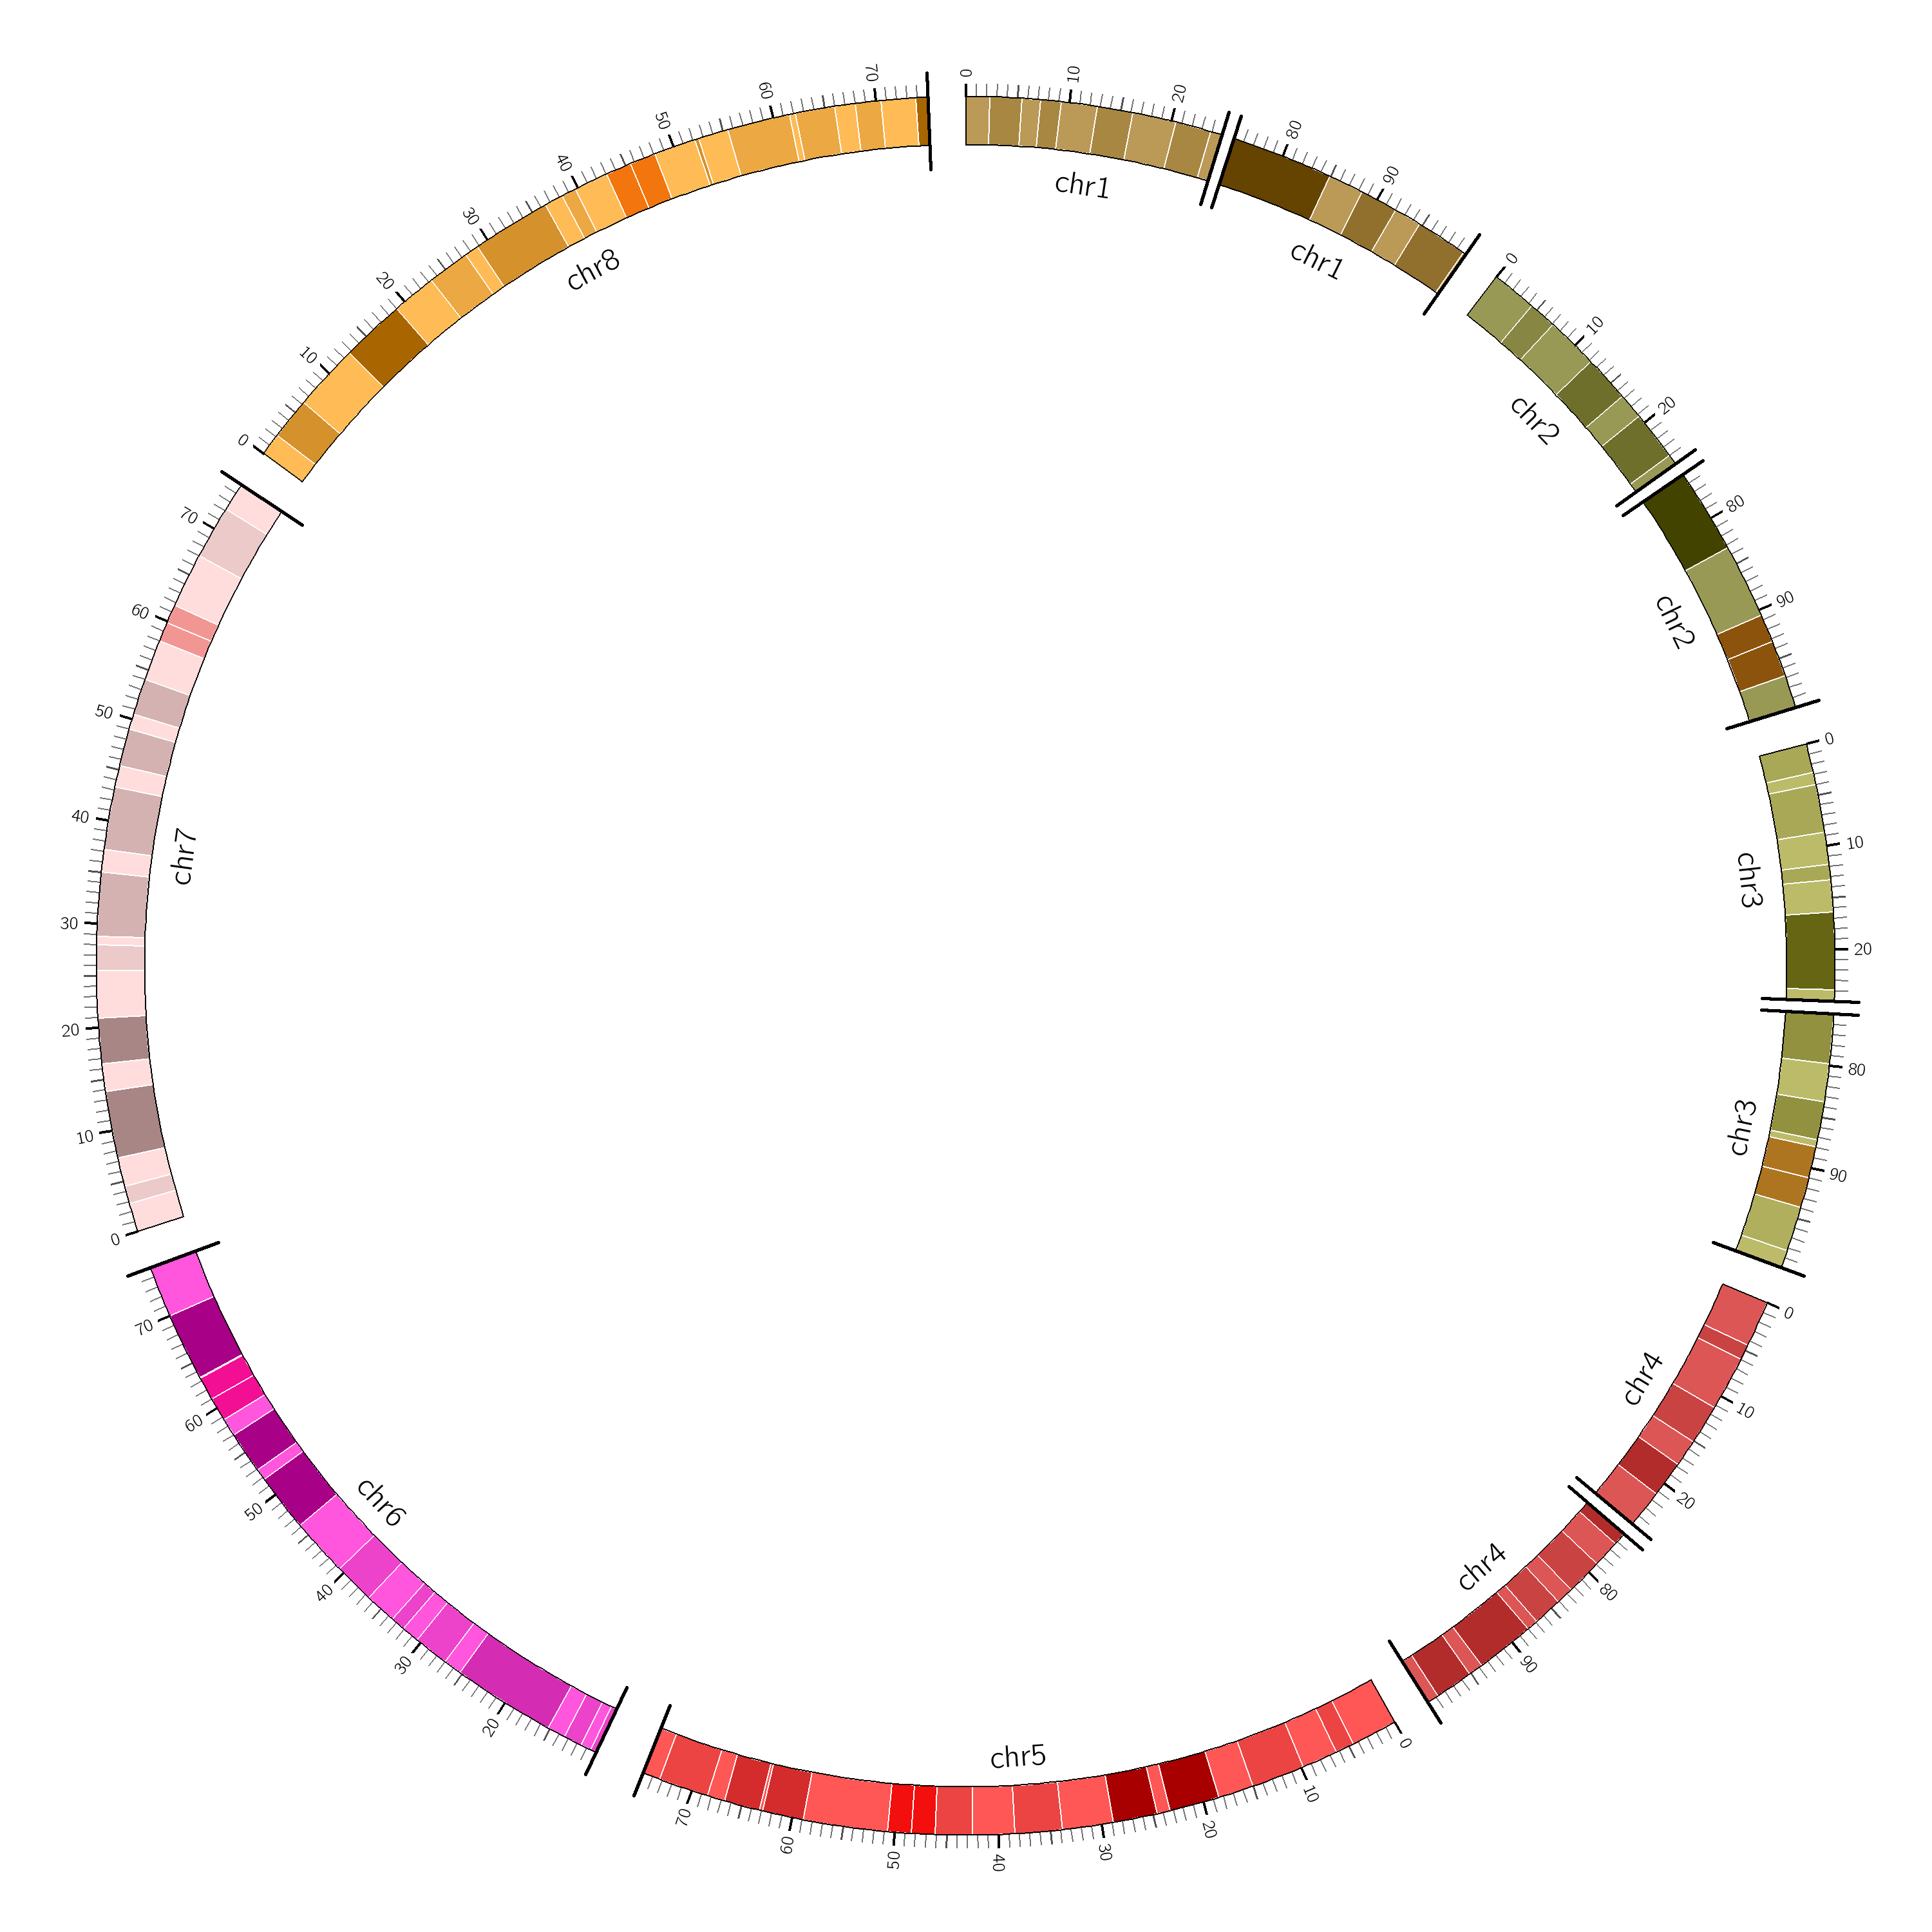

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Drawing Ideograms series by clicking [here &#10145;](Drawing_ideograms_Part6.ipynb).

----